In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import rasterio
import os

In [2]:
def read_method(method:str=''):
    if method == 'Image' or method == '':
        return Image.open
    if method == 'rasterio':
        return rasterio.open
    if method == 'numpy':
        return np.load


def image_normalize(im, axis = (0,1), c = 1e-8):
    return (im - im.mean(axis)) / (im.std(axis) + c)

In [ ]:
dir = "/home/lenovo/treeseg-dataset/inference/all-views/tif"
dir2 = "/home/lenovo/treeseg-dataset/inference/all-views/merge_result_128"
img = read_method('rasterio')(f'{dir}/pan0.tif').read(1)
img2 = read_method('rasterio')(f'{dir}/ndvi0.tif').read(1)

/home/lenovo/miniconda3/envs/tf-nov/lib/python3.7/site-packages/rasterio/__init__.py:220: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


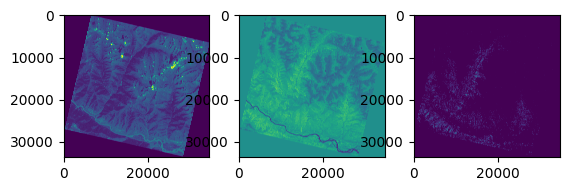

In [5]:
result_dir = "/home/lenovo/treeseg-dataset/inference/all-views/merge_result_128"
full_pan = read_method('rasterio')(f'{result_dir}/merge-result-pan.tif').read(1)
full_ndvi = read_method('rasterio')(f'{result_dir}/merge-result-ndvi.tif').read(1)
full_result = read_method('rasterio')(f'{result_dir}/merge-result-segmap.png').read(1)

fig = plt.figure()

fig.add_subplot(1,3,1)
plt.imshow(full_pan)
fig.add_subplot(1,3,2)
plt.imshow(full_ndvi)
fig.add_subplot(1,3,3)
plt.imshow(full_result)

plt.show()

In [6]:
print(f'shapes: {full_pan.shape},{full_ndvi.shape},{full_result.shape}')

shapes: (33705, 34659),(33705, 34659),(33705, 34659)


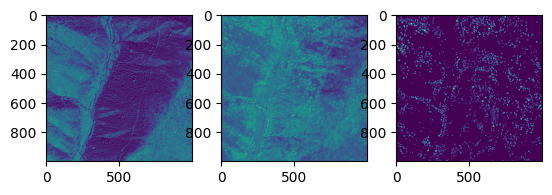

In [11]:
# partial
a = 20000; b=20500; c=5000; d=5500
p1 = full_pan[a:b,c:d]
p2 = full_ndvi[a:b,c:d]
p3 = full_result[a:b,c:d]

fig2 = plt.figure()

fig2.add_subplot(1,3,1)
plt.imshow(p1)
fig2.add_subplot(1,3,2)
plt.imshow(p2)
fig2.add_subplot(1,3,3)
plt.imshow(p3)

plt.show()

In [ ]:
# rootdir="/home/lenovo/treeseg-dataset/full_process/sample_108"
# rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_sample_128"
rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_result_128"

a=68
r=102
c=74
v=0
# schema_name_match = f"{rootdir}/r{r}c{c}-match{v}.png"
# schema_name_match = f"{rootdir}/match-0-area{a}-r{r}c{c}.png"
schema_name_match = f"{rootdir}/r{r}c{c}-match{v}.png"

im = read_method('rasterio')(schema_name_match.replace('match','segmap')).read(1)
arr = np.array(im)
# im2 = read_method('rasterio')(schema_name_match.replace('match','ndvi')).read(1)
# arr2 = np.array(im2)

# im3 = read_method('rasterio')(schema_name_match.replace('match','annotation')).read(1)
# arr3 = np.array(im3)
# im4 = read_method('rasterio')(schema_name_match.replace('match','boundary')).read(1)
# arr4 = np.array(im4)

print(arr.shape)
fig = plt.figure()

fig.add_subplot(1,4,1)
plt.imshow(arr)

# fig.add_subplot(1,4,2)
# plt.imshow(arr2)

# fig.add_subplot(1,4,3)
# plt.imshow(arr3)
# fig.add_subplot(1,4,4)
# plt.imshow(arr4)
plt.show()

In [ ]:
# rootdir="/home/lenovo/treeseg-dataset/full_process/sample_108"
sample_rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_sample_128"
result_rootdir="/home/lenovo/treeseg-dataset/inference/all-views/inference_result_128"

a=68
r=112
c=78
v=0
sample_schema_name_match = f"{sample_rootdir}/r{r}c{c}-match{v}.png"
# schema_name_match = f"{rootdir}/match-0-area{a}-r{r}c{c}.png"
result_schema_name_match = f"{result_rootdir}/r{r}c{c}-match{v}.png"

im = read_method('Image')(sample_schema_name_match.replace('match','pan'))
arr = np.array(im)
print(f"min-max of pan: {np.min(arr)},{np.max(arr)}")
im2 = read_method('Image')(sample_schema_name_match.replace('match','ndvi'))
arr2 = np.array(im2)

im3 = read_method('Image')(result_schema_name_match.replace('match','segmap'))
arr3 = np.array(im3)

# im4 = read_method('Image')(schema_name_match.replace('match','boundary'))
# arr4 = np.array(im4)

print(arr.shape)
fig = plt.figure()

fig.add_subplot(1,4,1)
plt.imshow(arr)

fig.add_subplot(1,4,2)
plt.imshow(arr2)

fig.add_subplot(1,4,3)
plt.imshow(arr3)
# fig.add_subplot(1,4,4)
# plt.imshow(arr4)
plt.show()

In [ ]:
root_dir = "/home/lenovo/treeseg-dataset/inference/all-views/merge_result_128"
# img = read_method("rasterio")(f"{root_dir}/merge_result_partial0-3-pan.png").read(1)
img = read_method("Image")(f"{root_dir}/merge_result_partial5-4-pan.png")
img = np.asarray(img)

# img = img[0:500,0:500]
# img_arr = image_normalize(img)
img_arr = img
print(f"min-max: {np.min(img_arr)}, {np.max(img_arr)}")
print(img.shape)
plt.imshow(img_arr, cmap=1)
print(np.mean(img_arr))
print(np.unique(img_arr))
plt.show()